<a href="https://colab.research.google.com/github/amrios80/data-analysis-airbnb/blob/master/airbnb/eda_amrios80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - San Francisco, CA, USA [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in the city. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2024

In [1]:
import pandas as pd



import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Load the data

In [22]:
dataset_url="https://github.com/amrios80/data-analysis-airbnb/raw/master/data/listings.csv.gz"

# Loading the CSV file as dataframe
listings_df = pd.read_csv(dataset_url, compression='gzip')



In [23]:
# Showing dataframe dimensions
listings_df.shape

(7888, 75)

In [24]:
# Showing column types
listings_df.dtypes

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
name,object
description,object
neighborhood_overview,object
picture_url,object
host_id,int64


In [25]:
#fifa_df.head() # Showing the first rows
#fifa_df.tail() # Showing last first rows
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4621,983984258312427155,https://www.airbnb.com/rooms/983984258312427155,20240604143925,2024-06-04,city scrape,"Blueground | Soma, theater & bball, nr tech co",Feel at home wherever you choose to live with ...,This furnished rental is located in Hayes Vall...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,"New York, NY","We’re Blueground, a global proptech company wi...",within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/d0ad9...,https://a0.muscache.com/im/pictures/user/d0ad9...,Cambridge,4730,5009,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Downtown/Civic Center,NaN,37.776701,-122.419204,Entire rental unit,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Lockbox"", ""Gym"", ""Bed linens"", ""Long term st...",$255.00,31,1125,31.0,365.0,1125.0,1125.0,41.2,1125.0,NaN,t,4,19,49,324,2024-06-04,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,177,177,0,0,NaN
2497,1063961840074968061,https://www.airbnb.com/rooms/1063961840074968061,20240604143925,2024-06-04,city scrape,New! Modern Hayes Valley Condo,Beautiful recently renovated 2 Bedroom 2 Bath ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,71975,https://www.airbnb.com/users/show/71975,Oscar,2010-01-20,"San Francisco, CA","Family man who likes to eat, travel and meet n...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/ac652...,https://a0.muscache.com/im/pictures/user/ac652...,North & East,24,29,"['email', 'phone']",t,t,NaN,Western Addition,NaN,37.774300,-122.430320,Entire condo,Entire home/apt,4,2.0,2 baths,2.0,0.0,"[""Freezer"", ""Bed linens"", ""Long term stays all...",$347.00,1,28,1.0,2.0,28.0,28.0,1.3,28.0,NaN,t,13,29,39,53,2024-06-04,8,8,5,2024-04-20,2024-05-25,4.88,4.88,5.00,5.0,5.00,5.00,4.88,2024-001354STR,f,7,6,1,0,5.22
3574,780507157786474013,https://www.airbnb.com/rooms/780507157786474013,20240604143925,2024-06-04,previous scrape,Mid-Market Luxury Stay,This listing is for my entire 1400 square foot...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,119444620,https://www.airbnb.com/users/show/119444620,Bailey,2017-03-06,"San Francisco, CA",Canadian woman living in SF who enjoys seeing ...,within a day,100%,94%,t,https://a0.muscache.com/im/pictures/user/155b2...,https://a0.muscache.com/im/pictures/user/155b2...,Civic Center,1,2,"['email', 'phone']",t,t,NaN,Downtown/Civic Center,NaN,37.776787,-122.418101,Entire rental unit,Entire home/apt,4,NaN,2 baths,2.0,NaN,"[""Freezer"", ""Baking sheet"", ""Blender"", ""Bed li...",NaN,2,29,2.0,2.0,29.0,29.0,2.0,29.0,NaN,t,0,0,0,0,2024-06-04,20,12,1,2023-02-03,2024-05-19,5.00,5.00,5.00,4.9,5.00,4.7

### 2. Univariate analysis

In [26]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()

7888

In [27]:
# Showing unique values of neighborhoods
listings_df["neighbourhood_cleansed"].unique()

array(['Downtown/Civic Center', 'Russian Hill', 'Noe Valley', 'Mission',
       'Nob Hill', 'Bernal Heights', 'West of Twin Peaks',
       'Haight Ashbury', 'Castro/Upper Market', 'Financial District',
       'Outer Mission', 'Marina', 'Inner Sunset', 'South of Market',
       'Twin Peaks', 'Visitacion Valley', 'Chinatown', 'Outer Sunset',
       'Parkside', 'Diamond Heights', 'Western Addition', 'Ocean View',
       'Outer Richmond', 'Inner Richmond', 'Pacific Heights',
       'North Beach', 'Excelsior', 'Glen Park', 'Lakeshore', 'Bayview',
       'Potrero Hill', 'Presidio Heights', 'Seacliff', 'Crocker Amazon',
       'Golden Gate Park', 'Presidio', 'Treasure Island/YBI'],
      dtype=object)

In [28]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

,proportion
room_type,
Entire home/apt,0.628423
Private room,0.357252
Hotel room,0.007480
Shared room,0.006846


In [29]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,accommodates
count,7888.000000
mean,3.216024
std,2.004303
min,1.000000
5%,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
95%,7.000000
max,16.000000


<span style="color: red;">What does it mean the value of 0 for this attribute?</span>

In [30]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

[]

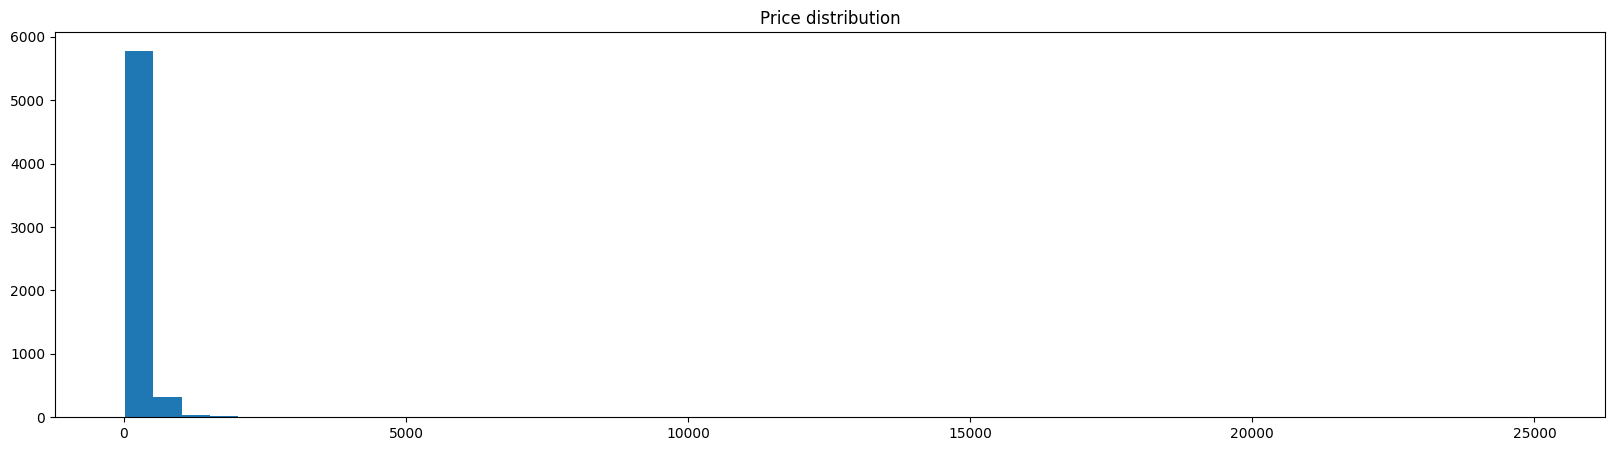

In [31]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has an extreme outlier making difficult a proper visualization?</span>

In [32]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

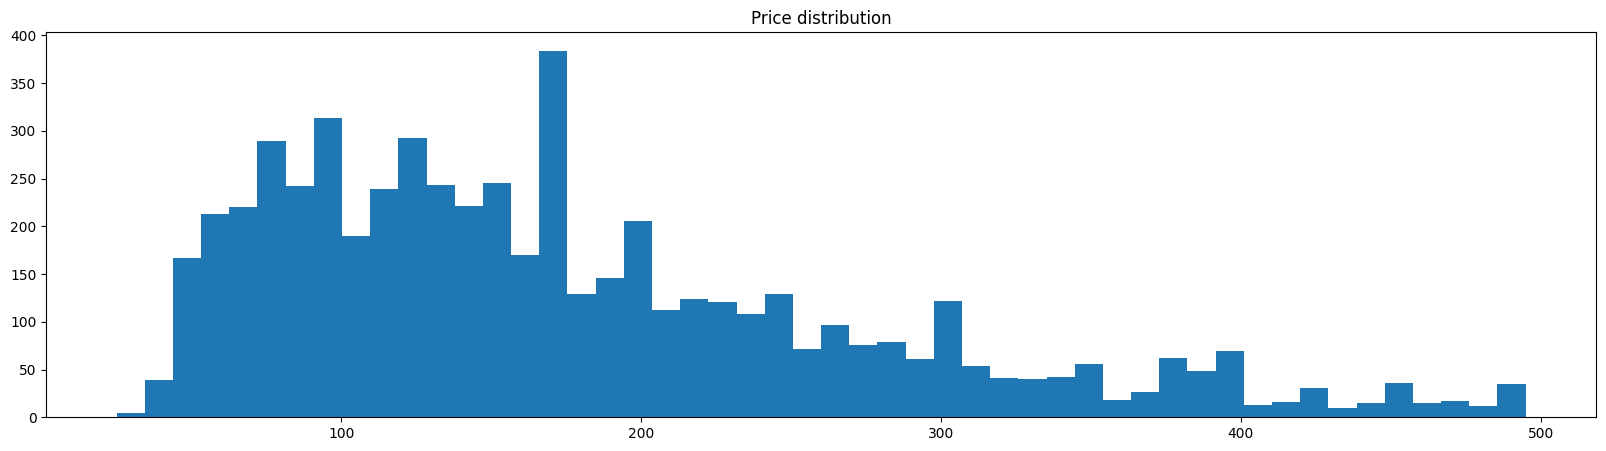

In [33]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

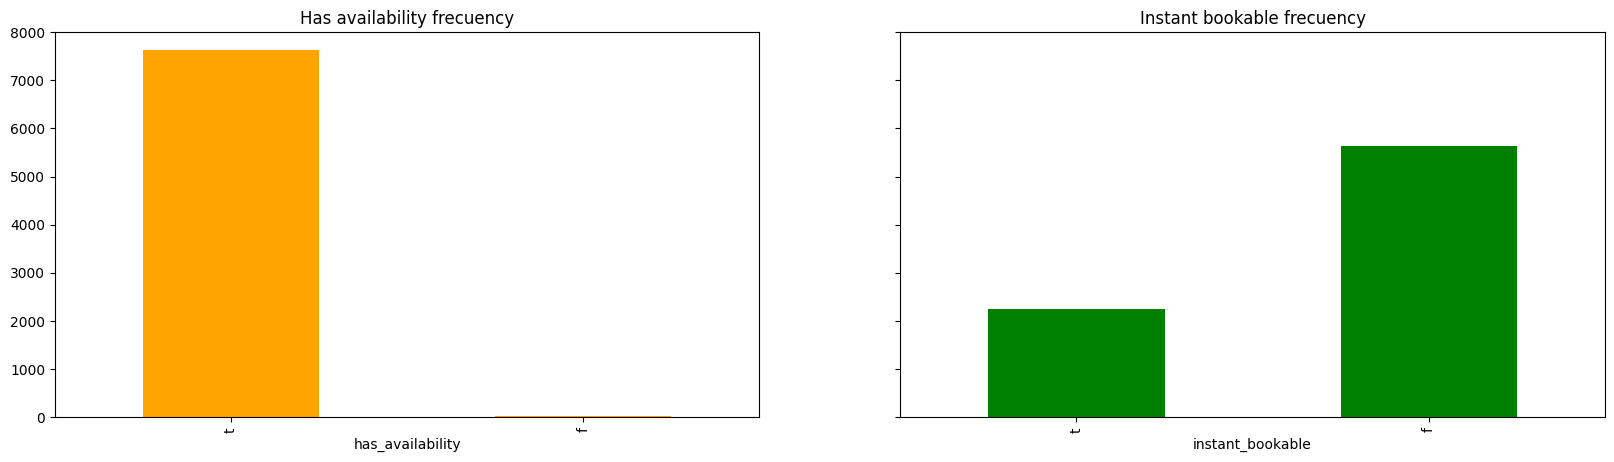

In [34]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

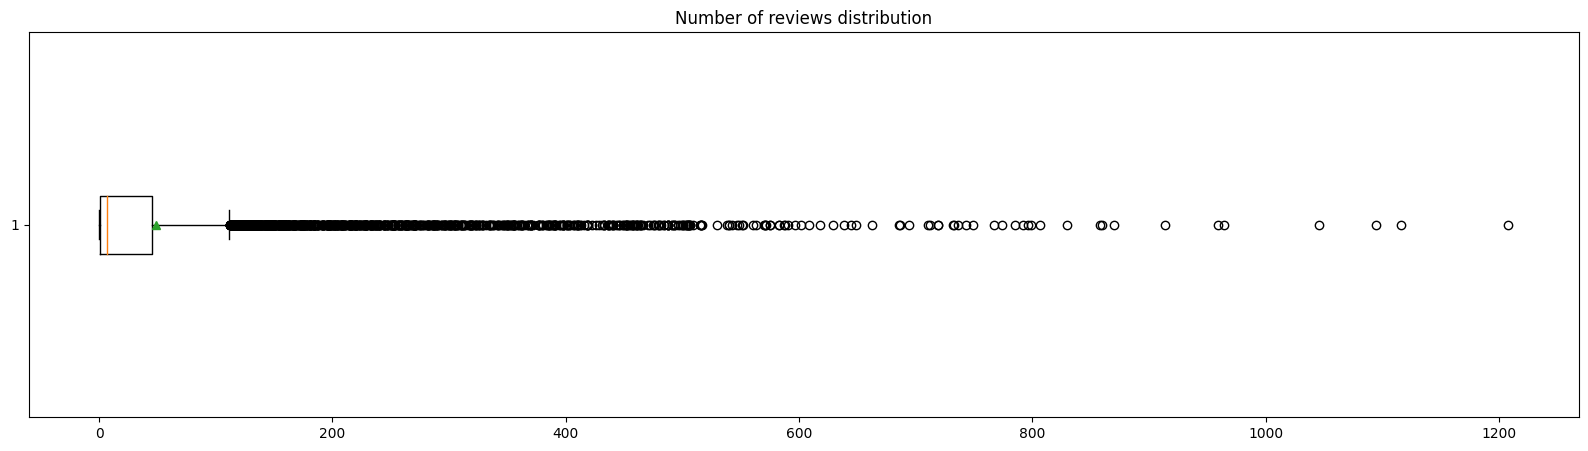

In [35]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

### 2. Bivariate analysis

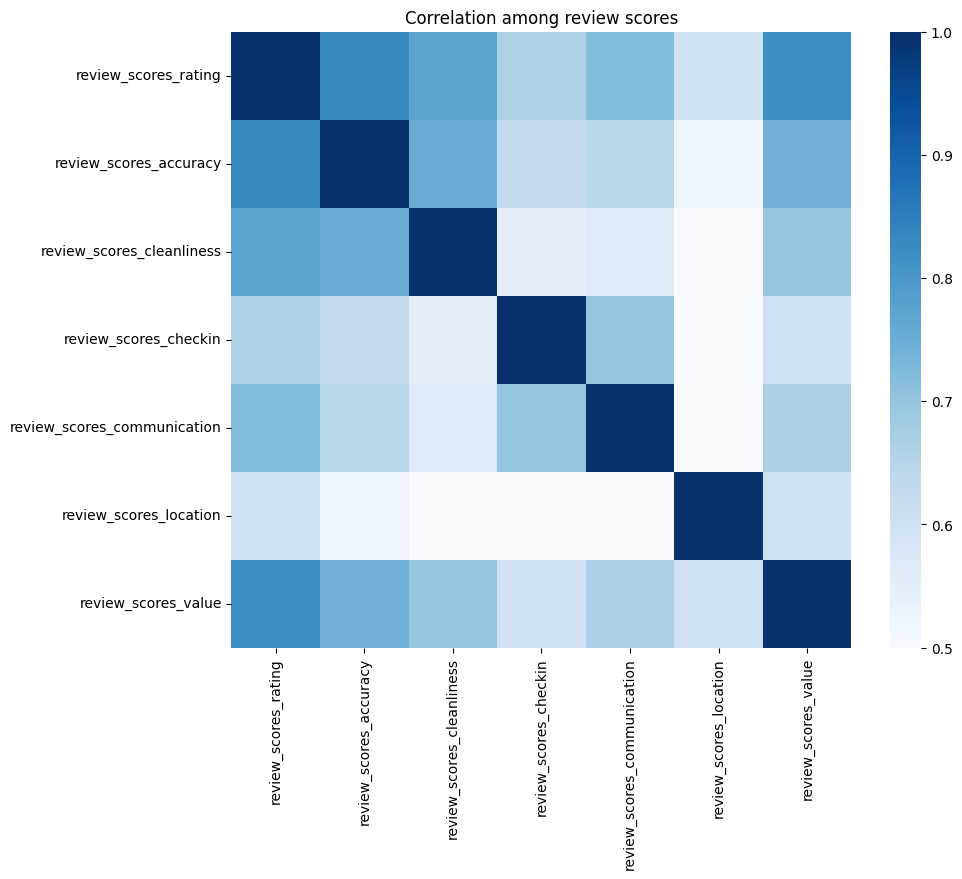

In [36]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [37]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(571, 76)

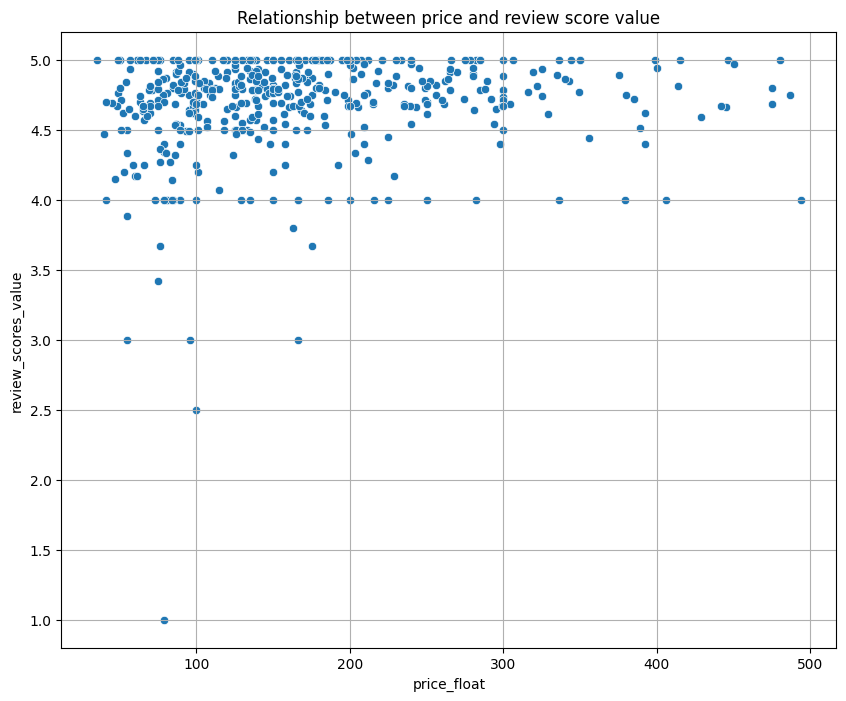

In [38]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [39]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

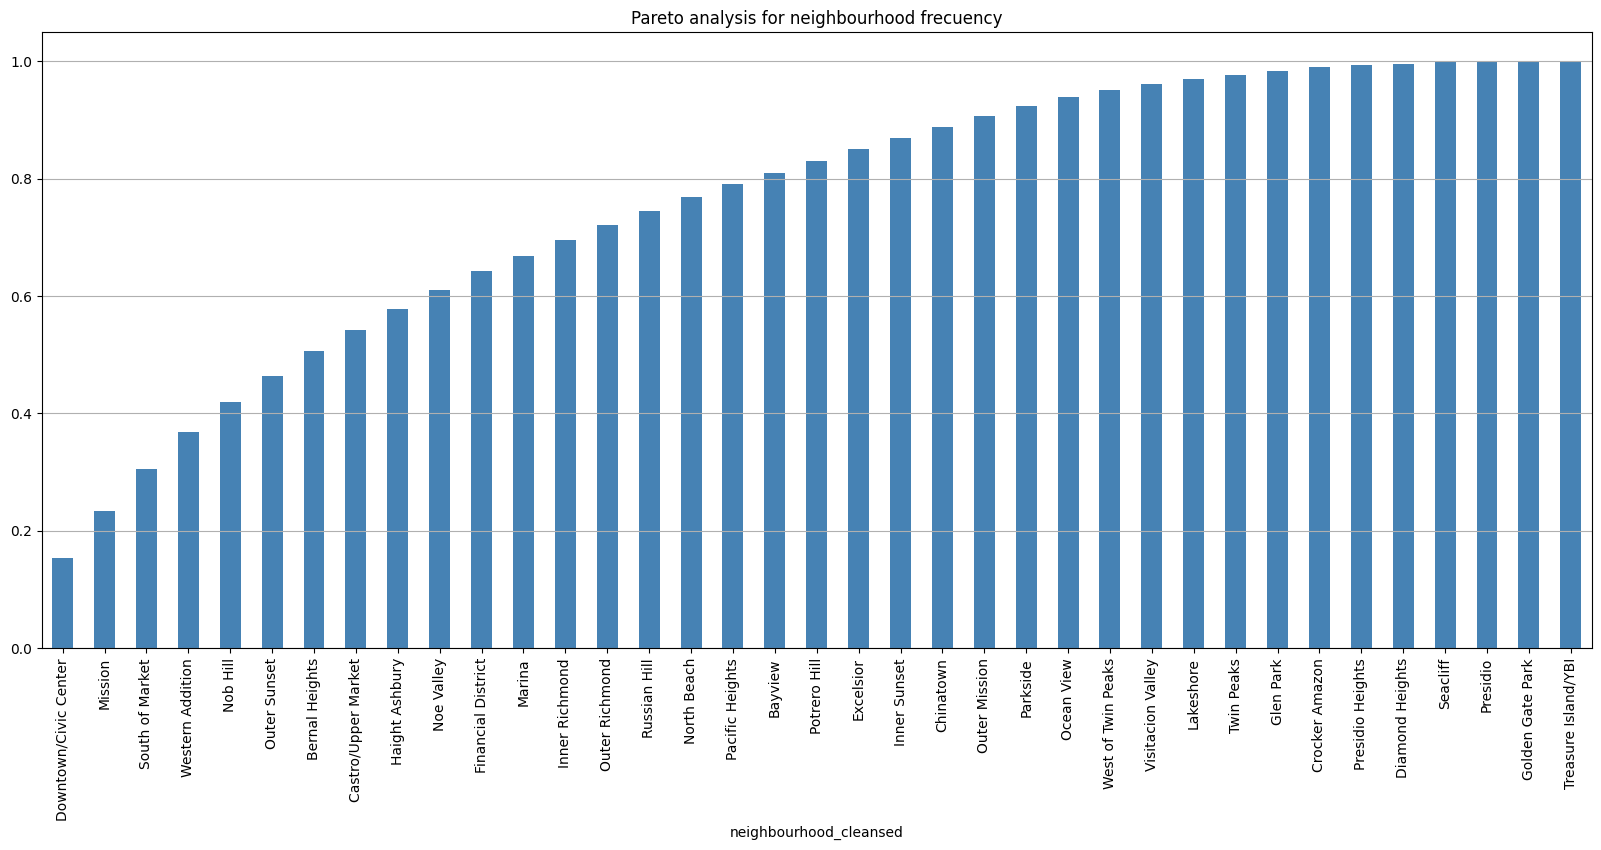

In [40]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [41]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Downtown/Civic Center',
 'Mission',
 'South of Market',
 'Western Addition',
 'Nob Hill',
 'Outer Sunset',
 'Bernal Heights',
 'Castro/Upper Market',
 'Haight Ashbury',
 'Noe Valley',
 'Financial District',
 'Marina',
 'Inner Richmond',
 'Outer Richmond',
 'Russian Hill',
 'North Beach',
 'Pacific Heights']

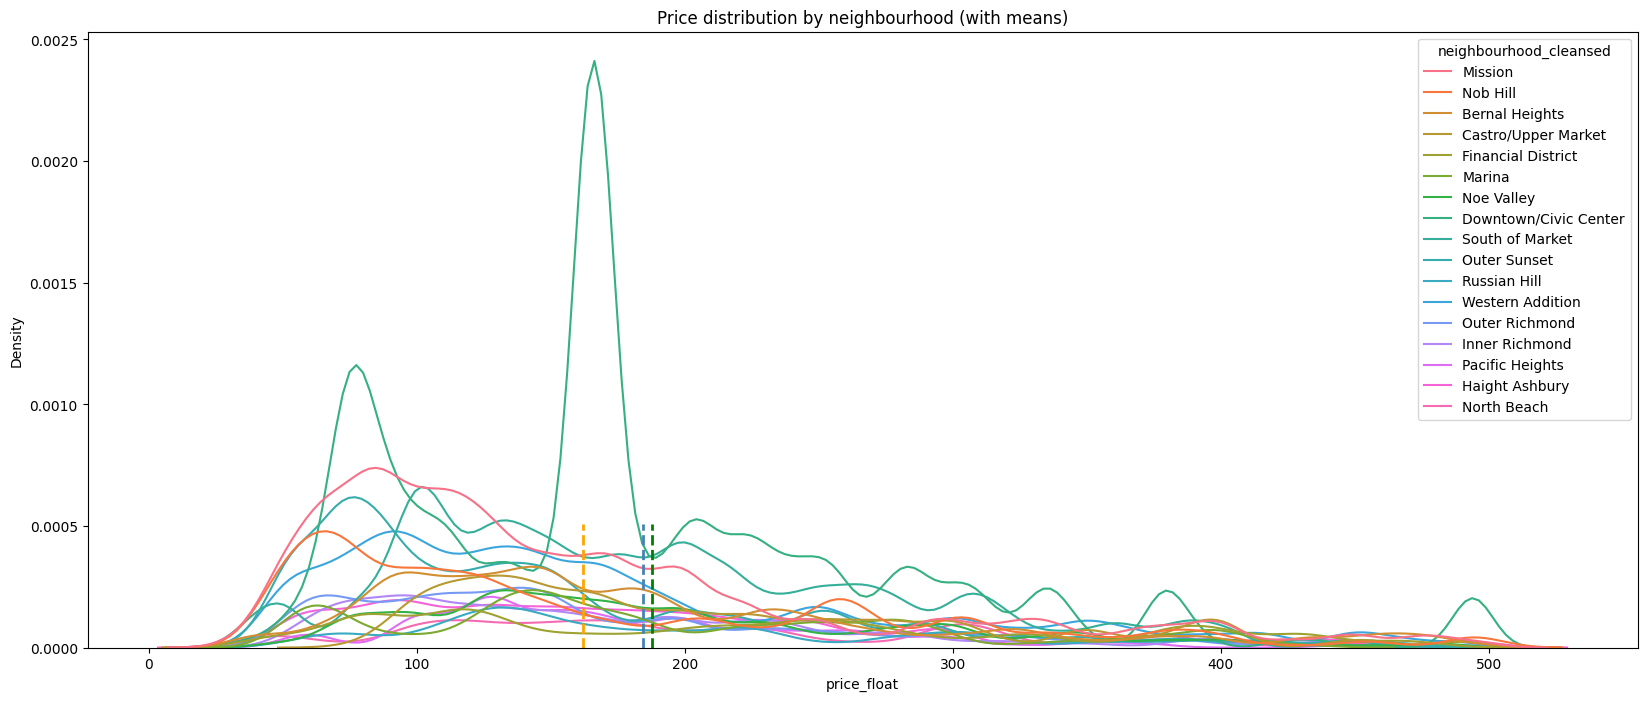

In [42]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

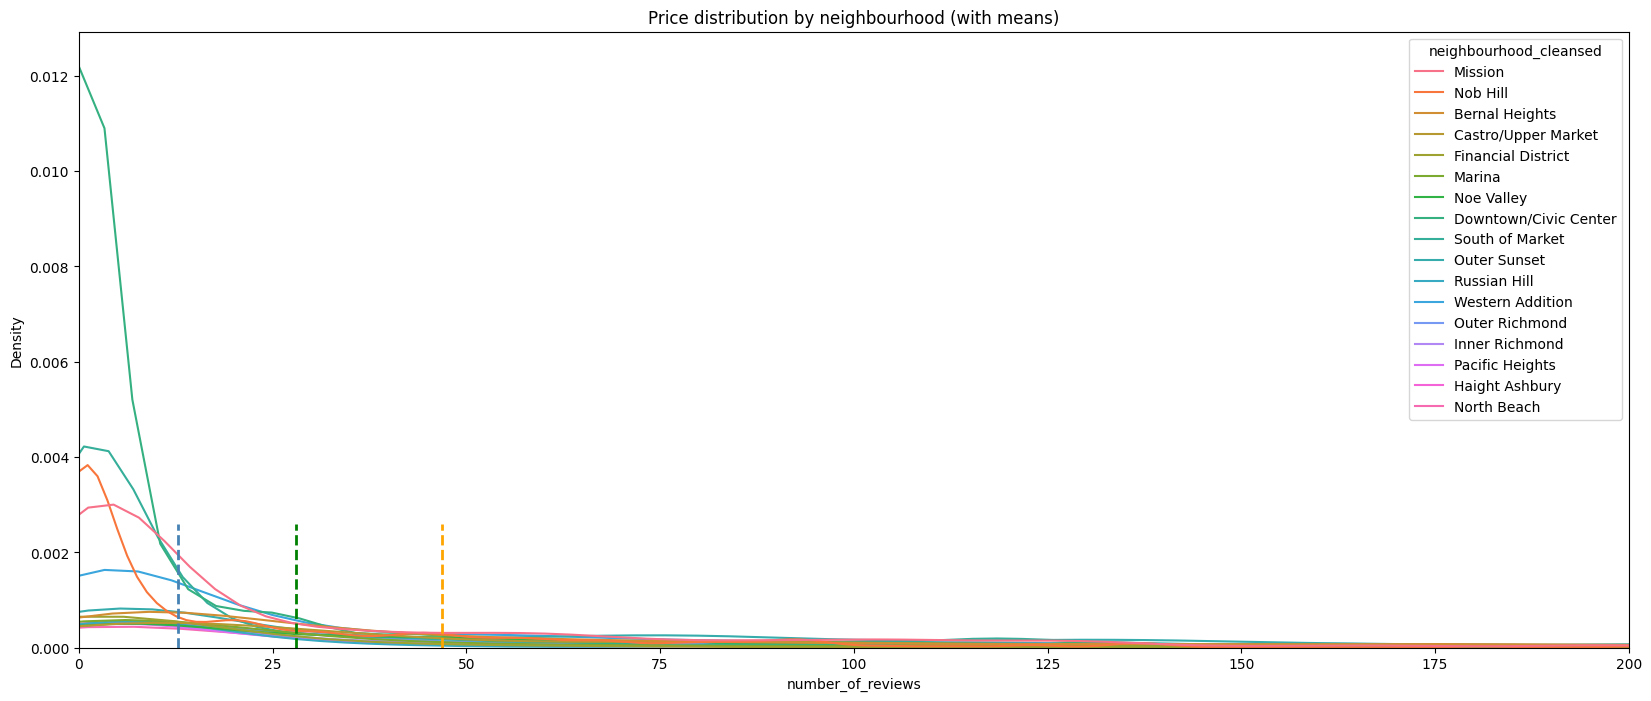

In [44]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()